# CAR PRICE PREDICTION 

Car Price Prediction is a project where we use the features of a car, such as:

  1. Mileage: How far the car has been driven (lower mileage may increase price).
  2. Brand Premium: Whether the car is from a high-end brand (premium brands often have higher prices).
  3. Engine Size: The size of the car's engine (larger engines may increase price).

Using these features, we build a MULTIPLE LINEAR REGRESSION MODEL to predict the car's price. This involves analyzing how these features impact price and using this relationship to make accurate predictions.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# DATA COMPREHENSION

### FORESIGHT DATASET

In [222]:
df = pd.read_csv('car_price.csv')[0:100]
df

,Age,Mileage,Brand_Premium,Engine_Size,Price
0,9,85774,1,2.3,32946.666003
1,13,46103,0,3.3,18876.546105
2,9,89970,0,1.3,16287.626203
3,4,145477,1,1.8,40848.473692
4,3,158236,1,1.8,40332.230672
...,...,...,...,...,...
95,5,138534,0,3.0,30410.154130
96,1,187860,0,1.2,26926.809590
97,14,33779,0,3.9,21678.933576
98,10,83182,0,3.5,24337.841153


### FIRST & LAST RAWS

In [225]:
df.head()

,Age,Mileage,Brand_Premium,Engine_Size,Price
0,9,85774,1,2.3,32946.666003
1,13,46103,0,3.3,18876.546105
2,9,89970,0,1.3,16287.626203
3,4,145477,1,1.8,40848.473692
4,3,158236,1,1.8,40332.230672


In [227]:
df.tail()

,Age,Mileage,Brand_Premium,Engine_Size,Price
95,5,138534,0,3.0,30410.154130
96,1,187860,0,1.2,26926.809590
97,14,33779,0,3.9,21678.933576
98,10,83182,0,3.5,24337.841153
99,11,67588,0,3.4,22683.089136


### DATA UPDATION 

In [266]:
df.drop('Brand_Premium',axis = 1, inplace = True)
df

,Age,Mileage,Engine_Size,Price
2,9,89970,1.3,16287.626203
3,4,145477,1.8,40848.473692
4,3,158236,1.8,40332.230672
5,1,181839,2.3,45371.460443
6,2,178738,3.9,41272.452284
...,...,...,...,...
95,5,138534,3.0,30410.154130
96,1,187860,1.2,26926.809590
97,14,33779,3.9,21678.933576
98,10,83182,3.5,24337.841153


### STATS INFO 

In [268]:
df.describe()

,Age,Mileage,Engine_Size,Price
count,98.000000,98.000000,98.000000,98.000000
mean,7.387755,109507.040816,2.409184,27732.572594
std,4.145878,49029.660519,0.894322,10771.488469
min,1.000000,32232.000000,1.000000,5788.096161
25%,4.000000,66373.250000,1.700000,20018.515230
50%,7.500000,108314.500000,2.300000,27789.784370
75%,11.000000,149510.000000,3.100000,34273.444108
max,14.000000,189727.000000,3.900000,53629.481589


### TYPES INFO OF FEATURES 

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 2 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          98 non-null     int64  
 1   Mileage      98 non-null     int64  
 2   Engine_Size  98 non-null     float64
 3   Price        98 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 5.9 KB


# EDA [ EXPLORATORY DATA ANALYSIS ]

### MISSING VALUE 

In [272]:
df.isnull().sum()

Age            0
Mileage        0
Engine_Size    0
Price          0
dtype: int64

### FINDING DUPLICATE VALUES

In [275]:
df.duplicated().sum()

0

### VISUALIZE REPRESENTATION OF DATA 

### REGRESSION PLOT

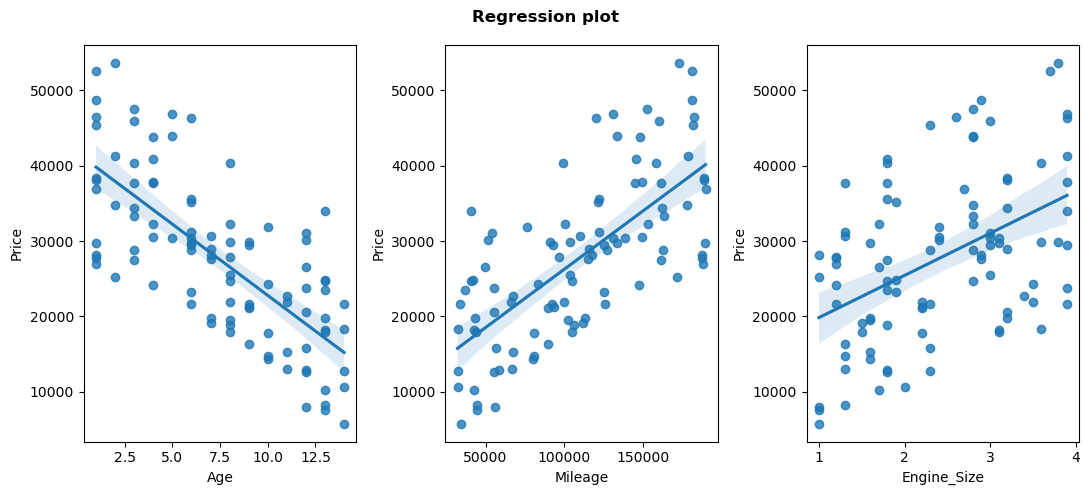

In [364]:
plt.figure(figsize=(11,5))
plt.suptitle('Regression plot',fontsize=12, fontweight='bold')

for x in range(0,len(feature)-1):
    plt.subplot(1,3,x+1)
    sns.regplot(x=df[feature[x]], y='Price', data=df)
    plt.xlabel(feature[x])
    plt.tight_layout()
    


#### PAIRPLOT

<Figure size 800x600 with 0 Axes>

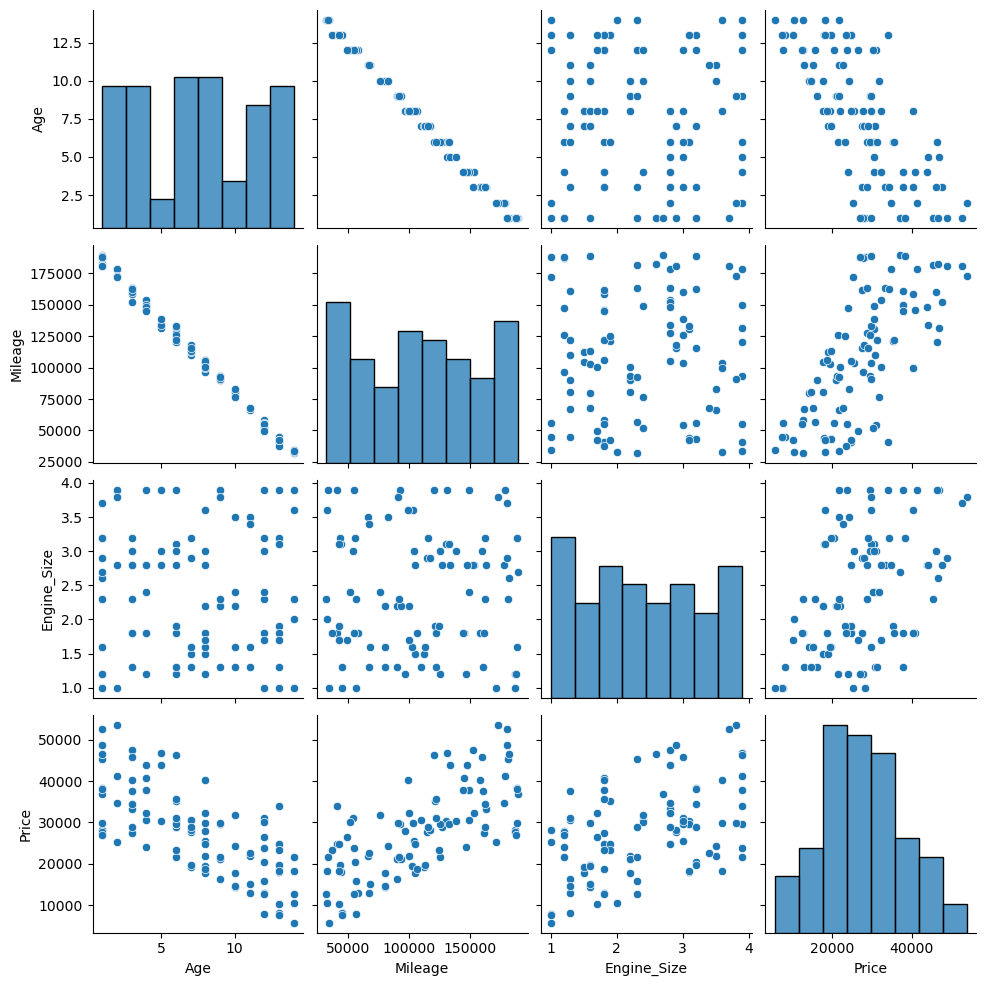

In [290]:
plt.figure(figsize=(8,6))
plt.suptitle('PairPlot of Data',fontsize=12, fontweight='bold')
sns.pairplot(data=df,kind='scatter')
plt.show()

#### BOXPLOT (detecting outlier)

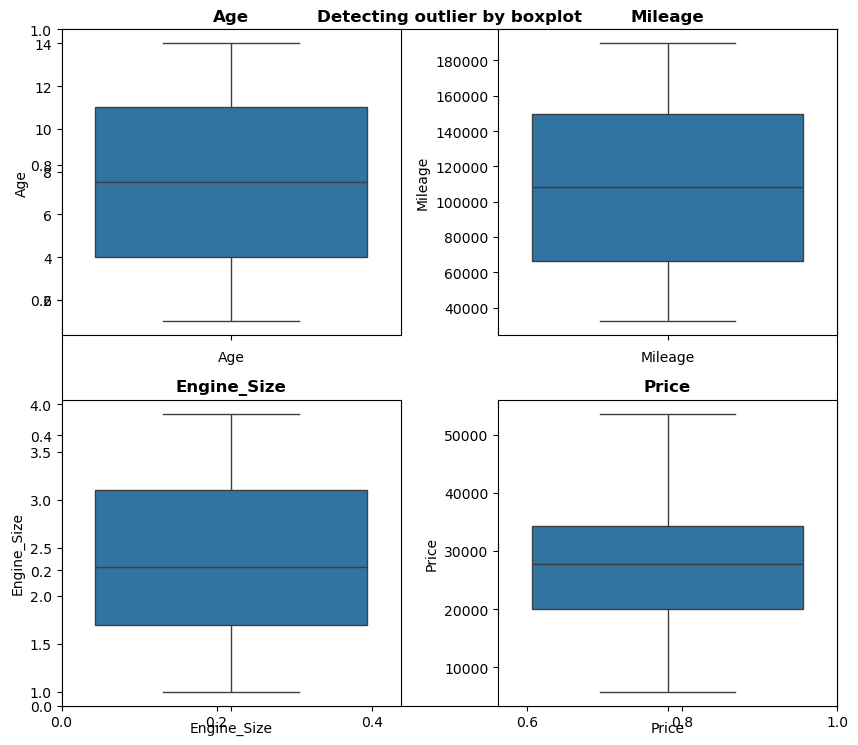

In [310]:
feature = df.columns
plt.figure(figsize=(9,8))
plt.title('Detecting outlier by boxplot',fontsize = 12, fontweight = 'bold')

for i in range(0,len(feature)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df[feature[i]])
    plt.title(feature[i],fontsize = 12, fontweight = 'bold')
    plt.xlabel(feature[i])
    plt.tight_layout()


### DISTRIBUTION [KDE PLOT]

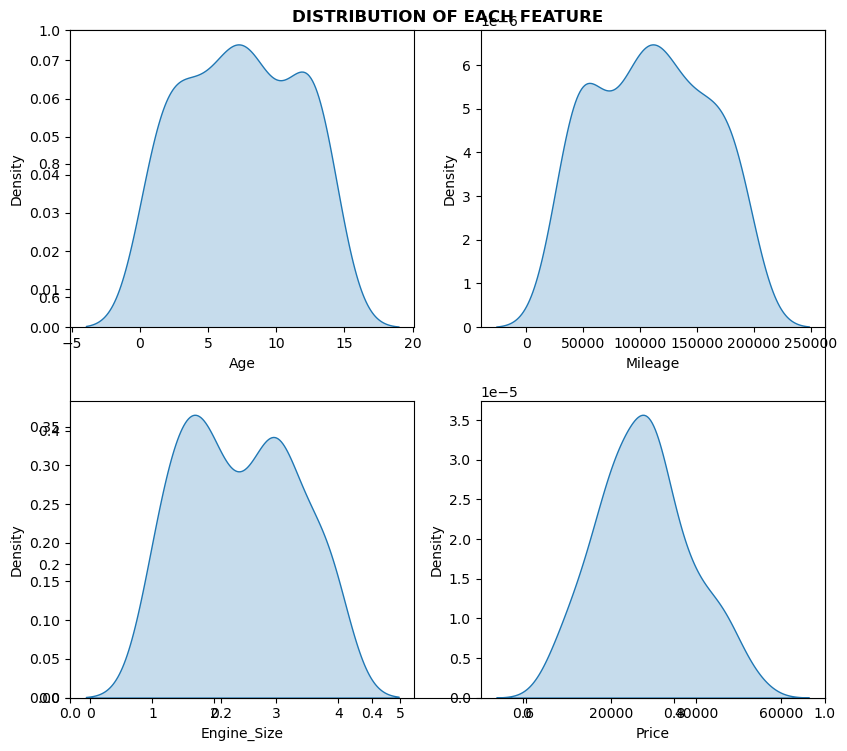

In [317]:
plt.figure(figsize=(9,8))
plt.title('DISTRIBUTION OF EACH FEATURE',fontsize = 12, fontweight = 'bold')

for i in range(0,len(feature)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[feature[i]], fill= True)
    plt.xlabel(feature[i])
    plt.tight_layout()


# DATA PREPROCESSING

### SPLIT DATASET INTO TRAIN & TEST DATA 

In [334]:
X = df[['Age','Mileage','Engine_Size']]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### STANDARDIZE/NORMALIZE 

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BUILD THE MODEL & EVALUATING

### LINEAR REGRESSION BY GRADIENT DESCENT

In [374]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [402]:
print('slope : ',regression.coef_)
print('intercept : ',regression.intercept_)

slope :  [-82432.44900907 -74282.87378011   4882.08089247]
intercept :  27408.34294624961


### CROSS VALIDATION

In [562]:
from sklearn.model_selection import cross_val_score
validation = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation

array([-17290225.86060125, -16947416.73360289, -11142179.16768907])

In [564]:
np.mean(validation)

-15126607.253964404

### PREDICTING THE TEST DATAS 

In [575]:
y_pred = regression.predict(X_test)
y_pred

array([41423.23602012, 16089.4115352 , 28672.33918903, 34701.29103605,
       29016.5258995 , 38240.48481338, 14008.59095186, 31610.00709026,
       28940.89314088, 19761.85163238, 26069.77543699, 38713.04866294,
       38332.62724579, 29245.84098007, 15208.3075894 , 37518.05212585,
       50287.63986116, 27048.89349014, 26206.677249  , 38848.42751725,
       25203.04978541, 32993.71174956, 21965.73872339, 24819.0066736 ,
       29023.80193143])

### PERFORMANCE METRIX 

In [581]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2_adjusted = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('PERFORMANCE METRIX')
print(f'MSE : {mse} \nMAE : {mae} \nRMSE : {rmse} \nr2 : {r2} \nadjusted_r2 : {r2_adjusted}')

PERFORMANCE METRIX
MSE : 13658041.219990721 
MAE : 3171.381483624731 
RMSE : 3695.678722506966 
r2 : 0.8573264142247543 
adjusted_r2 : 0.8369444733997192


# PREDICTION

In [590]:
regression.predict(scaler.transform([[4,150000,2.0]]))

array([31230.30375022])

# ASSUMPTIONS  

Text(0.5, 1.0, 'TEST DATA WITH PREDICT DATA ARE LINEARLY , SO MODEL IS WELL')

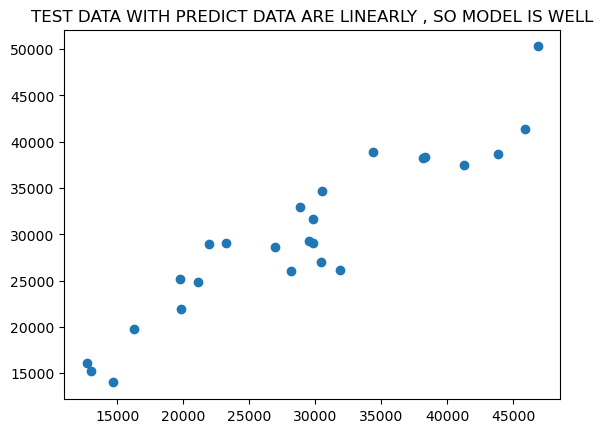

In [613]:
plt.scatter(y_test,y_pred)
plt.title('TEST DATA WITH PREDICT DATA ARE LINEARLY , SO MODEL IS WELL')

In [595]:
residuals = y_test - y_pred
residuals

64    4480.929759
42   -3426.584181
96   -1745.529599
20   -4210.936222
83     762.365667
85     -94.486295
66     681.565855
44   -1769.204388
12   -6970.993000
2    -3474.225429
33    2053.451135
77    5119.473327
49      -8.872205
28     290.248734
46   -2190.825619
6     3754.400158
24   -3458.021897
14    3385.154138
92    5631.604177
75   -4500.778914
51   -5471.233751
72   -4186.761697
70   -2123.992924
17   -3703.480364
41   -5789.417653
Name: Price, dtype: float64

Text(0.5, 1.0, 'RESIDUALS ARE NORMALLY DISTRIBUTED , SO MODEL IS WELL')

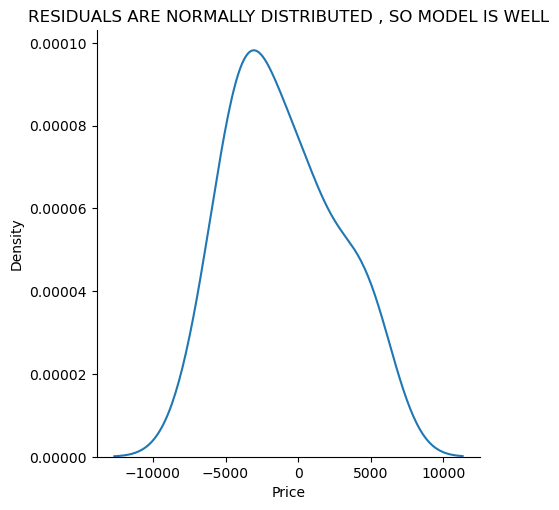

In [615]:
sns.displot(residuals,kind='kde')
plt.title('RESIDUALS ARE NORMALLY DISTRIBUTED , SO MODEL IS WELL')

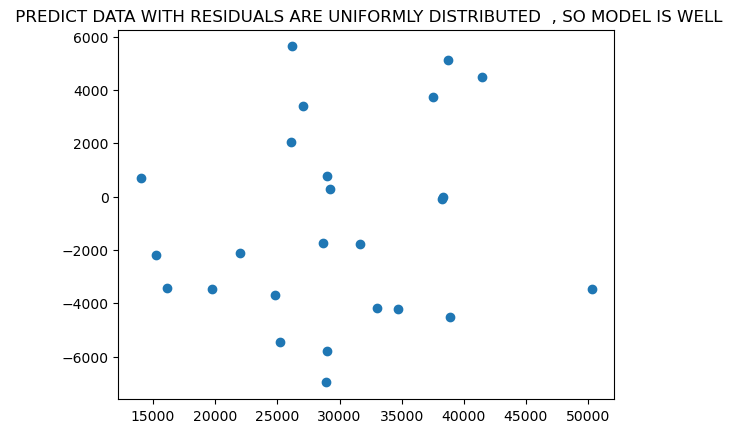

In [617]:
plt.title(' PREDICT DATA WITH RESIDUALS ARE UNIFORMLY DISTRIBUTED  , SO MODEL IS WELL')
plt.scatter(y_pred,residuals)